In [1]:
%matplotlib inline

Main Page: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.expand_frame_repr', False)

In [4]:
train_file_path = '../../data/hp/train.csv'
test_file_path = '../../data/hp/test.csv'

In [5]:
dr = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

# all data use for handling missing data
all_data = pd.concat((dr, test)).reset_index(drop=True)

In [6]:
test_ID = test['Id']

In [5]:
dr.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
dr.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
id_c = ['Id']
cat_c = ['MSZoning', 'MSSubClass', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
         'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
         'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PavedDrive', 
         'MiscVal', 'SaleType', 'SaleCondition']
num_c = []
ignore_c = ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'GarageYrBlt', 'Utilities',
           'MasVnrArea', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [9]:
def fill_data(all_data):
    all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))
    
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        all_data[col] = all_data[col].fillna('None')

    all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
    all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

    all_data["Functional"] = all_data["Functional"].fillna("Typ")
    
    #'MSZoning missing data '
    all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

    #'Electrical'
    all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

    all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

    all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
    all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

    all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

    all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [28]:
# computing null
null_count = all_data[list(set(cat_c) - set(ignore_c))].isnull().sum()
null_count[null_count > 0].sort_values()

Series([], dtype: int64)

In [26]:
for col_name in cat_c:
    dr[col_name] = dr[col_name].astype('category')
    dr[col_name] = dr[col_name].cat.codes

In [11]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [34]:
import seaborn as sns

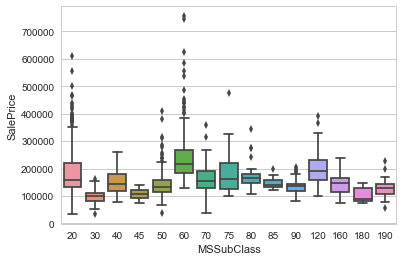

In [68]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="MSSubClass", y="SalePrice", data=dr)

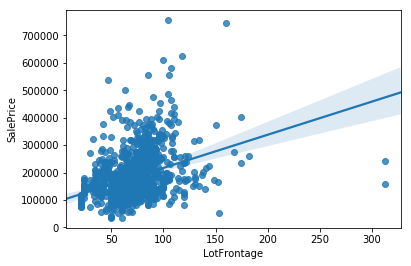

In [35]:
sns.regplot(x="LotFrontage", y="SalePrice", data=dr)

In [41]:
dr.query('LotFrontage > 250')
dr.query('SalePrice > 700000').query('LotFrontage < 200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,5,3,104.0,21535,Pave,NaN,0,3,0,...,0,NaN,NaN,NaN,0,1,2007,8,4,755000
1182,1183,5,3,160.0,15623,Pave,NaN,0,3,0,...,555,Ex,MnPrv,NaN,0,7,2007,8,0,745000


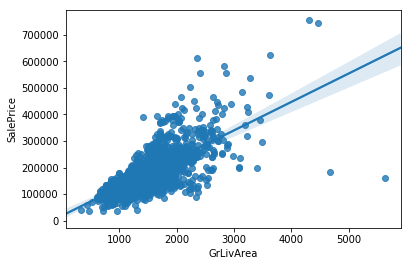

In [38]:
sns.regplot(x="GrLivArea", y="SalePrice", data=dr)

In [42]:
dr.query('GrLivArea > 4500')
dr.query('GrLivArea > 4000').query('SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,5,3,104.0,21535,Pave,NaN,0,3,0,...,0,NaN,NaN,NaN,0,1,2007,8,4,755000
1182,1183,5,3,160.0,15623,Pave,NaN,0,3,0,...,555,Ex,MnPrv,NaN,0,7,2007,8,0,745000


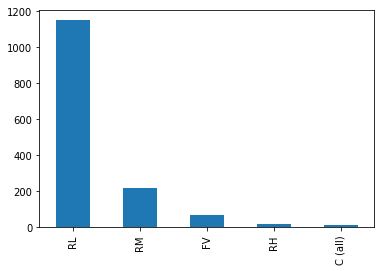

In [13]:
# show different value count
dr['MSZoning'].value_counts().plot(kind='bar')

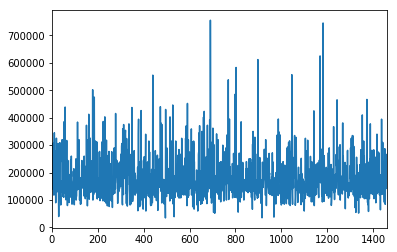

In [14]:
dr['SalePrice'].plot()

In [104]:
# convert string(object) to int
for column in dr.select_dtypes(['object']).columns:
    dr[column] = dr[column].astype('category')
    dr[column] = dr[column].cat.codes
# dr.isnull().sum()

# show code
# dr['MSZoning'].cat.codes

# show categories mapping
# dict(enumerate(dr['MSZoning'].cat.categories))

# select unique
dr['MSZoning'].unique()
#array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

# query by filter string
string = 'RL'
dr.query('MSZoning == @string')

In [99]:
ignore_columns = ['MasVnrArea', 'PoolQC', 'Fence', 'MiscFeature', 'Alley', 'LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
feature_columns = list(set((dr.columns)) - set(ignore_columns) - set('SalePrice'))
y_column = ['SalePrice']

In [125]:
dr_ = (dr.assign(M_1= lambda x: None)
         .assign(M_2= lambda x: None))

# type(dr[['MSSubClass']].iloc[0])

### Base Models Selection

In [ ]:
# XGB
# random forest 

In [ ]:
import tensorflow

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import KFold

In [ ]:
n_folds = 5
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(dr_):
    X = dr_.iloc[train_index][feature_columns]
    y = dr_.iloc[train_index][y_column]
    
    clf = svm.SVR()
    clf.fit(X, y)
    test_result = clf.predict(dr_.iloc[test_index][feature_columns])
    for i, predict_value in zip(test_index, test_result):
        # update dataframe one cell
        dr_.set_value(i, 'M_2', predict_value)

In [56]:
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [51]:
from sklearn.linear_model import Lasso

In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
from sklearn.kernel_ridge import KernelRidge

In [54]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [55]:
Gbr_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
import xgboost as xgb

In [50]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### Stacking Models